In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Load Results

In [2]:
results = pd.read_csv('threshold-results.csv', header=None)

results.columns = [
    'method', 'run',
    *[f'{i}' for i in range(0, 50, 1)]
]

results['method'] = results['method'].str \
    .replace('pos_ratio:', '') \
    .replace('-pos:.*', '', regex=True)

In [3]:
results = results.loc[results['method'].isin(['1%', '10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%'])]

### Select 3 Lines Per Method

In [4]:
data = { 'method': [], 'epoch': [], 'threshold': [], 'repetition': [] }
methods = sorted(results['method'].unique())

for method in methods:
    rows = results.loc[results.method == method][:3]
    for idx, (_, row) in enumerate(rows.iterrows()):
        for epoch, val in enumerate(row[2:]):
            data['method'].append(method)
            data['epoch'].append(epoch)
            data['threshold'].append(val)
            data['repetition'].append(idx)

data = pd.DataFrame(data)
data.head()

,method,epoch,threshold,repetition
0,1%,0,0.010,0
1,1%,1,0.005,0
2,1%,2,0.010,0
3,1%,3,0.010,0
4,1%,4,0.005,0


In [5]:
data['prior'] = data.method.str.replace('%', '', regex=False).astype(int)

data.sort_values(by='prior', ascending=False, inplace=True)

hue_label = 'Positive\nClass\nSize'
data.rename(columns={ 'method': hue_label }, inplace=True)

### Configure Seaborn

In [6]:
plt.rcParams.clear()

params = {
    'figure.titlesize': 22,
    'figure.figsize': (20, 8),
    'legend.fontsize': 18,
    'font.size': 20,
    'legend.frameon': True,
    'xtick.labelsize': 18,
    'ytick.labelsize': 18,
    'lines.markersize': 20,
    'legend.markerscale': 1.5,
    'axes.labelpad': 10,
    'axes.labelsize': 20,
    'legend.loc': 'upper left'
}

plt.style.use(['seaborn-poster', 'grayscale', 'seaborn-whitegrid'])

plt.rcParams.update(params)

In [14]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib import cm


In [41]:
greys = cm.get_cmap('Greys', 13)

In [42]:
my_greys = cm.get_cmap('Greys', 13)

my_palette = my_greys(np.linspace(0, 1, 13))

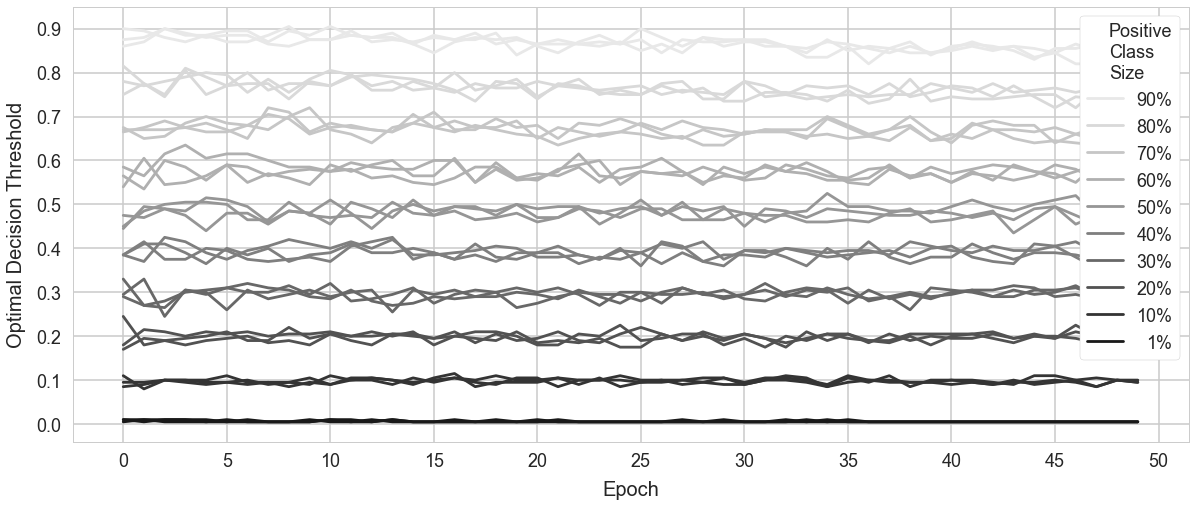

In [44]:
ax = sns.lineplot(
    palette=my_palette[2:-1],
    data=data, 
    x='epoch', 
    y='threshold', 
    hue=hue_label,
    units='repetition',
    estimator=None)

leg = plt.legend(loc='upper right', framealpha=1)
ax.set_xticks(range(0, 51, 5));
ax.set_yticks(np.arange(0.0, 1.0, 0.1));
ax.set_yticklabels(np.round(np.arange(0.0, 1.0, 0.1), decimals=1));
plt.ylabel('Optimal Decision Threshold');
plt.xlabel('Epoch');

hp = leg._legend_box.get_children()[1]
for vp in hp.get_children():
    for row in vp.get_children():
        row.set_width(85)  # need to adapt this manually
        row.mode= "expand"
        row.align="right"
        
ax.figure.savefig('ecbdl-optimal-thresholds-vs-epochs.png')
plt.show()